In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Dependencies 
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
Base_data = '/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset'


**Preprocessing**

In [ ]:
# Preprocessing
import cv2
import os
import imghdr
data = tf.keras.utils.image_dataset_from_directory(Base_data, image_size=(224,224))
data_dir = Base_data 
image_exts = ['png']
image_size = (224, 224)

for image_class in os.listdir(data_dir): 
    for image_name in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image_name)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts or 'mask' in image_name: 
                # print('Image not in ext list or has mask in its name: {}'.format(image_path))
                os.remove(image_path)
            else:
                img = cv2.resize(img, image_size)
                cv2.imwrite(image_path, img)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Found 647 files belonging to 2 classes.


In [ ]:
number_of_images = {}
for dir in os.listdir(Base_data):
  number_of_images[dir] = len(os.listdir(os.path.join(Base_data, dir)))

number_of_images.items()

dict_items([('benign', 437), ('malignant', 210)])

In [ ]:
# Encoding
unique_classes = []
for path in os.listdir(Base_data):
    unique_classes.append(path)
print(unique_classes)
class_index = [unique_classes[1], unique_classes[0]]
label_encoder = LabelEncoder()

# Fit the encoder to the unique classes and transform the class_index
encoded_classes = label_encoder.fit_transform(class_index)

# Print the encoded classes with their respective index values
for c, e in zip(class_index, encoded_classes):
    print(c, "-", e)

['benign', 'malignant']
malignant - 1
benign - 0


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


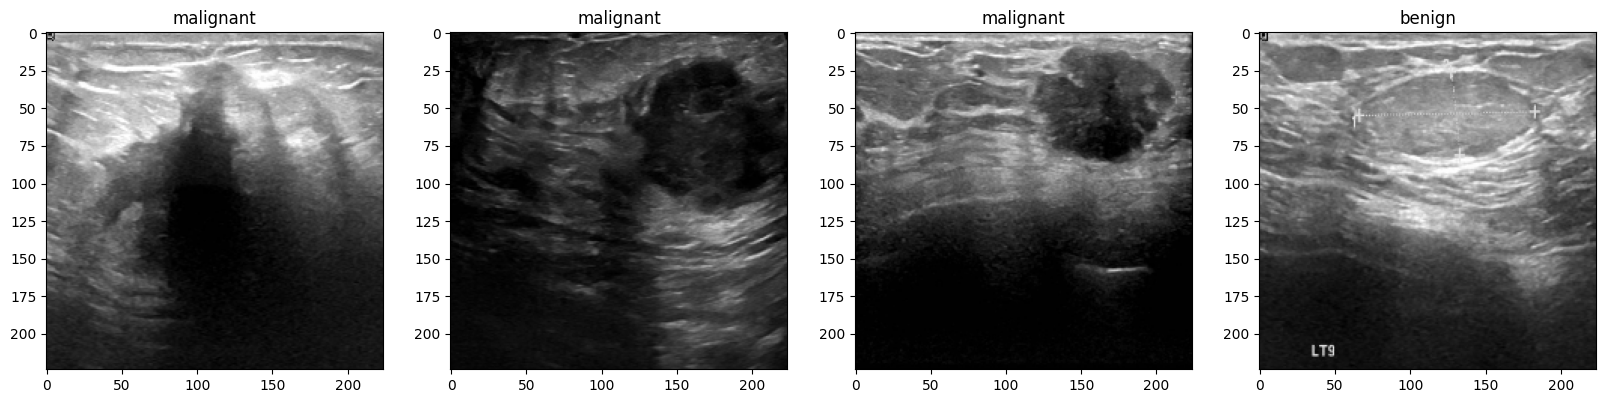

In [ ]:
# Display some examples - 0 is benign and 1 is malignant
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    if batch[1][idx] == 0:
        ax[idx].title.set_text('benign')
    else:
        ax[idx].title.set_text('malignant')


In [ ]:
# Scale the data 
# We standardize the pixels to range 0-1

data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


(array([[[[0.6392157 , 0.6392157 , 0.6392157 ],
          [0.5372549 , 0.5372549 , 0.5372549 ],
          [0.5254902 , 0.5254902 , 0.5254902 ],
          ...,
          [0.8039216 , 0.8039216 , 0.8039216 ],
          [0.8235294 , 0.8235294 , 0.8235294 ],
          [0.84313726, 0.84313726, 0.84313726]],
 
         [[0.13725491, 0.13725491, 0.13725491],
          [0.6745098 , 0.6745098 , 0.6745098 ],
          [0.5254902 , 0.5254902 , 0.5254902 ],
          ...,
          [0.8627451 , 0.8627451 , 0.8627451 ],
          [0.85490197, 0.85490197, 0.85490197],
          [0.84705883, 0.84705883, 0.84705883]],
 
         [[0.6901961 , 0.6901961 , 0.6901961 ],
          [0.03921569, 0.03921569, 0.03921569],
          [0.5294118 , 0.5294118 , 0.5294118 ],
          ...,
          [0.8745098 , 0.8745098 , 0.8745098 ],
          [0.8352941 , 0.8352941 , 0.8352941 ],
          [0.78431374, 0.78431374, 0.78431374]],
 
         ...,
 
         [[0.1254902 , 0.1254902 , 0.1254902 ],
          [0.12549

In [ ]:
# Split the data 
train_size = int(len(data)*.7)
# Used During Training
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Building the model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

# Conv layer 1
model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D())

# Conv layer 2
model.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

# Conv layer 3
model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(224, activation='relu'))
# Applied drop rate to reduce overfitting
model.add(Dropout(0.2)) 
# output layer
model.add(Dense(1, activation='sigmoid'))



**Compiling the model**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Model Summary**

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 32)      

**Model Training**

In [ ]:
tmodel = model.fit(train, validation_data= val, epochs=10, batch_size=32)

Epoch 1/10
14/14 [==============================] - 15s 189ms/step - loss: 0.7867 - accuracy: 0.6228 - val_loss: 0.6224 - val_accuracy: 0.6484
Epoch 2/10
14/14 [==============================] - 3s 195ms/step - loss: 0.6051 - accuracy: 0.6830 - val_loss: 0.6135 - val_accuracy: 0.6172
Epoch 3/10
14/14 [==============================] - 4s 245ms/step - loss: 0.5371 - accuracy: 0.7299 - val_loss: 0.3977 - val_accuracy: 0.8516
Epoch 4/10
14/14 [==============================] - 3s 190ms/step - loss: 0.4301 - accuracy: 0.7991 - val_loss: 0.5515 - val_accuracy: 0.6875
Epoch 5/10
14/14 [==============================] - 3s 193ms/step - loss: 0.4276 - accuracy: 0.7946 - val_loss: 0.3711 - val_accuracy: 0.7891
Epoch 6/10
14/14 [==============================] - 4s 242ms/step - loss: 0.3266 - accuracy: 0.8661 - val_loss: 0.5900 - val_accuracy: 0.6875
Epoch 7/10
14/14 [==============================] - 3s 196ms/step - loss: 0.3790 - accuracy: 0.8616 - val_loss: 0.3160 - val_accuracy: 0.9062
Epoch

**Plotting Performance Graphs**

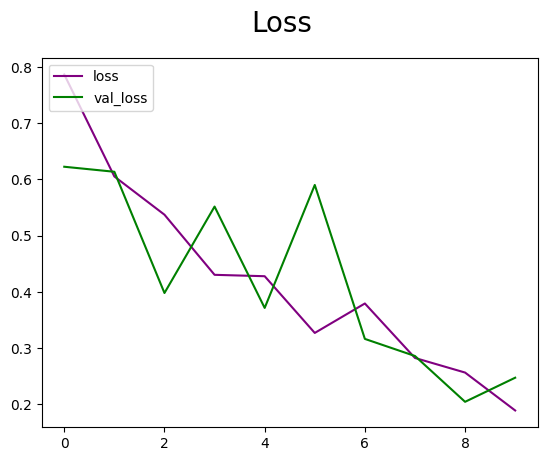

In [ ]:
# Plot Loss Graph
fig = plt.figure()
plt.plot(tmodel.history['loss'], color='purple', label='loss')
plt.plot(tmodel.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

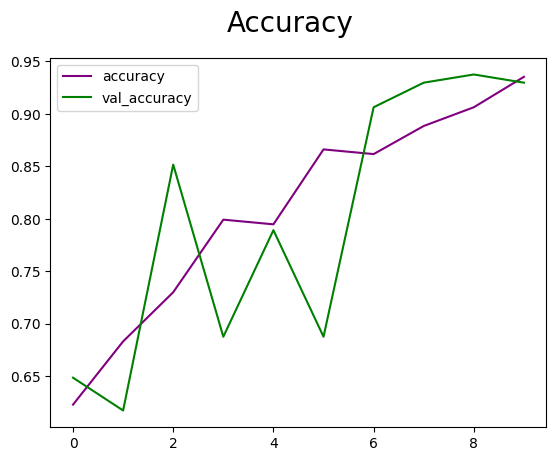

In [ ]:
# Accuracy Graph
fig = plt.figure()
plt.plot(tmodel.history['accuracy'], color='purple', label='accuracy')
plt.plot(tmodel.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Performance Evaluation**

In [ ]:
# To test performance of the model, we used 1 batch of the test dataset
import pandas as pd
from keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
# Use the test batch we had et aside.
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision : {pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 38ms/step
Precision : 1.0, Recall:0.7647058963775635,Accuracy:0.9375


In [ ]:
# Test on the first batch
y = y.reshape((-1,))
yhat = yhat.reshape((-1,))
yhat = yhat.round()
dfNew = pd.DataFrame(data={"Actual Value": y, "Predicted Value": yhat})

pd.set_option('display.max_rows', None)
dfNew


,Actual Value,Predicted Value
0,0,0.0
1,1,1.0
2,0,0.0
3,0,0.0
4,1,0.0
5,1,1.0
6,1,0.0
7,0,0.0
8,0,0.0
9,0,0.0


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
report = classification_report(y, yhat, target_names=['benign', 'malignant'], digits=4)
print(report)


              precision    recall  f1-score   support

      benign     0.8621    1.0000    0.9259        25
   malignant     1.0000    0.4286    0.6000         7

    accuracy                         0.8750        32
   macro avg     0.9310    0.7143    0.7630        32
weighted avg     0.8922    0.8750    0.8546        32



**Confusion Matrix**

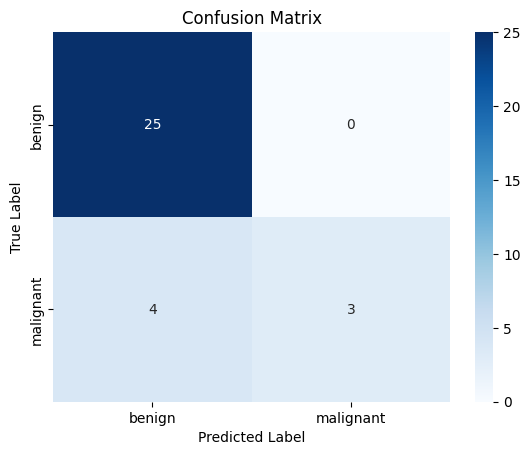

In [ ]:
# Define class labels
import seaborn as sns
# Compute confusion matrix 
cm = confusion_matrix(y, np.round(yhat))
class_names = ['benign', 'malignant']

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Test Single Images**

***Malignant Image***

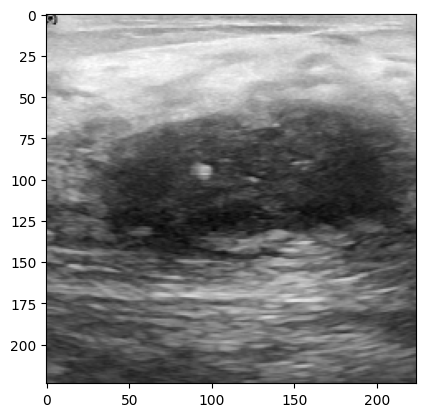

In [ ]:
# An already known Malignant Image
# An already known Malignant Image
img = cv2.imread('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/malignant/malignant (1).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

# img = np.array(img) # Convert to NumPy array
# #plt.imshow(img)
# plt.show()

# print(img) # Check the array values
# print(img.dtype) # Check the data type

# img = img.astype(np.uint8)

# resize = tf.image.resize(img, (224,224))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [ ]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
# Get the score value of the Image. Note the range should be between 0 and 1.
Img_pred.item()

1/1 [==============================] - 0s 186ms/step


0.9595746397972107

In [ ]:
def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have Breast Cancer. It is MALIGNANT


***benign Image***

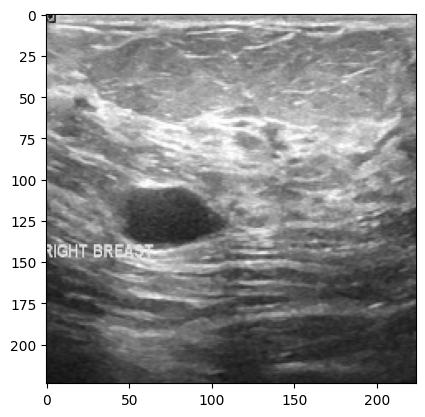

In [ ]:
# An already known Malignant Image
img = cv2.imread('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/benign/benign (100).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
# Get the score value of the Image. Note the range should be between 0 and 1.
Img_pred.item()

1/1 [==============================] - 0s 20ms/step


0.9595746397972107

In [ ]:
def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have Breast Cancer. It is MALIGNANT


**Save Model**

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/breastCancerClassifier.h5')


**Training using VGG16**

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# Load the VGG16 model without the top layers (include_top=False)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the VGG16 model layers weights
for layer in vgg_model.layers:
    layer.trainable = False

# Creating a new model a new model using the VGG16 model as a base
model = Sequential()
model.add(vgg_model)


# Adding  a new classifier layer on top of the base model
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the desired optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the data
history = model.fit(train, epochs=10, batch_size=32,validation_data=val)

Epoch 1/10
14/14 [==============================] - 6s 337ms/step - loss: 1.2928 - accuracy: 0.6674 - val_loss: 0.4632 - val_accuracy: 0.8047
Epoch 2/10
14/14 [==============================] - 4s 260ms/step - loss: 0.4352 - accuracy: 0.7902 - val_loss: 0.3203 - val_accuracy: 0.8594
Epoch 3/10
14/14 [==============================] - 5s 327ms/step - loss: 0.3710 - accuracy: 0.8348 - val_loss: 0.2814 - val_accuracy: 0.8984
Epoch 4/10
14/14 [==============================] - 4s 259ms/step - loss: 0.3388 - accuracy: 0.8571 - val_loss: 0.2420 - val_accuracy: 0.9297
Epoch 5/10
14/14 [==============================] - 4s 269ms/step - loss: 0.2599 - accuracy: 0.9040 - val_loss: 0.2405 - val_accuracy: 0.9219
Epoch 6/10
14/14 [==============================] - 5s 332ms/step - loss: 0.1884 - accuracy: 0.9397 - val_loss: 0.1866 - val_accuracy: 0.9375
Epoch 7/10
14/14 [==============================] - 6s 410ms/step - loss: 0.1578 - accuracy: 0.9375 - val_loss: 0.2024 - val_accuracy: 0.9375
Epoch 

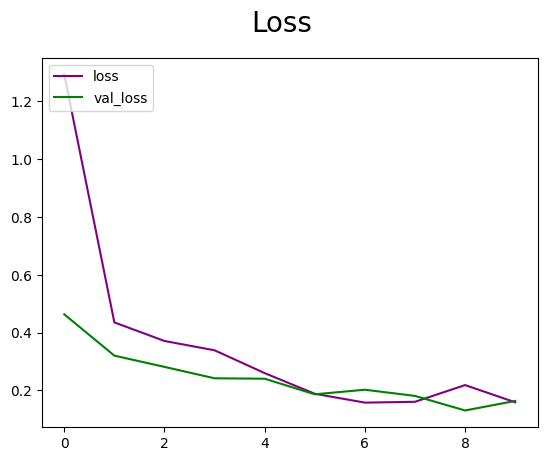

In [ ]:
# Plot Loss Graph
fig = plt.figure()
plt.plot(history.history['loss'], color='purple', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

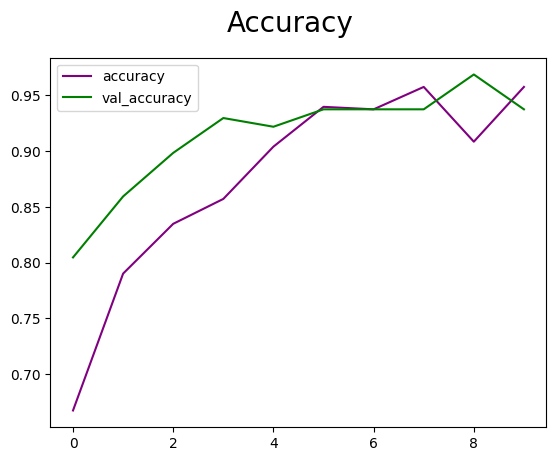

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='purple', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Performance Evaluation**

In [ ]:
# Model Perfomance
import pandas as pd
from keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
# Use the test batch we had et aside.
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision : {pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 29ms/step
Precision : 0.9473684430122375, Recall:0.9473684430122375,Accuracy:0.96875


In [ ]:
# Test on the first batch
y = y.reshape((-1,))
yhat = yhat.reshape((-1,))
yhat = yhat.round()
dfNew = pd.DataFrame(data={"Actual Value": y, "Predicted Value": yhat})

pd.set_option('display.max_rows', None)
dfNew


,Actual Value,Predicted Value
0,1,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0
5,1,1.0
6,1,1.0
7,1,1.0
8,0,0.0
9,0,0.0


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
report = classification_report(y, yhat, target_names=['benign', 'malignant'], digits=4)
print(report)


              precision    recall  f1-score   support

      benign     1.0000    0.9545    0.9767        22
   malignant     0.9091    1.0000    0.9524        10

    accuracy                         0.9688        32
   macro avg     0.9545    0.9773    0.9646        32
weighted avg     0.9716    0.9688    0.9691        32



**Confusion Matrix**

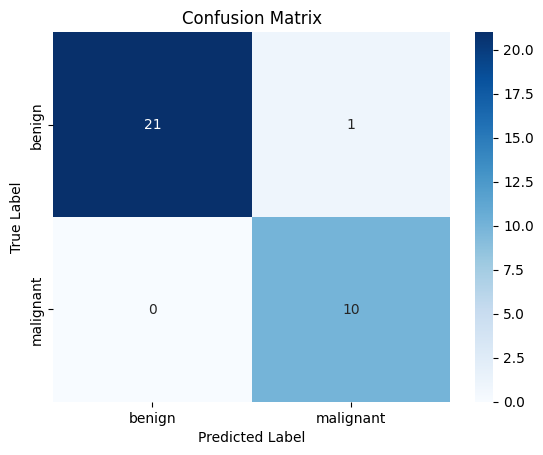

In [ ]:
# Define class labels
import seaborn as sns
# Compute confusion matrix 
cm = confusion_matrix(y, np.round(yhat))
class_names = ['benign', 'malignant']

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Test on some images**

***benign image***

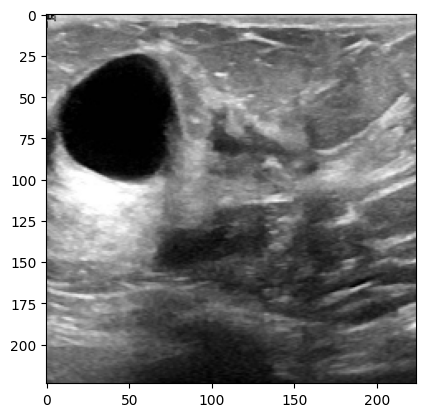

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/benign/benign (10).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
# Get the score value of the Image. Note the range should be between 0 and 1.
Img_pred.item()

1/1 [==============================] - 1s 664ms/step


0.007689131889492273

In [ ]:
def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have a tumor that is BENIGN.


***`malignant image 1`***

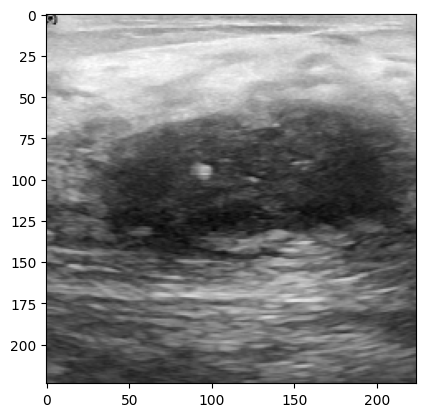

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/malignant/malignant (1).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
# Get the score value of the Image. Note the range should be between 0 and 1.
Img_pred.item()

1/1 [==============================] - 0s 19ms/step


0.6024981141090393

In [ ]:
def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have Breast Cancer. It is MALIGNANT


**malignant Image 2 to highlight a misclassification**

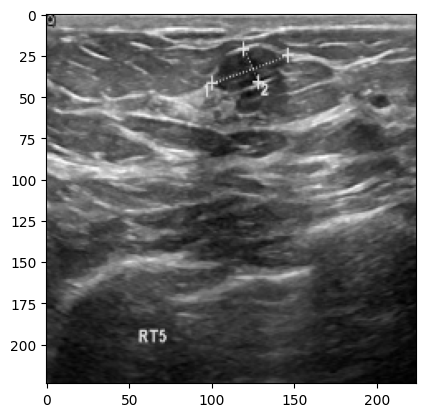

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/malignant/malignant (10).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
# Get the score value of the Image. Note the range should be between 0 and 1.
Img_pred.item()

1/1 [==============================] - 0s 20ms/step


0.47304075956344604

In [ ]:
'''
This is a misclassification.The image is supposed to be a Malignant Case.
To train our model, we used more benign images. As such, the model may perform better with 'benign images than malignant.
Additionally, our model performance using vgg16 is at 92% which means it may get some images wrong.
'''

def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have a tumor that is BENIGN.


**Save pretrained model + our Model**

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Artificial Intelligence materials/SummativeY3T2/BinaryClassificationDataset/vgg16breastCancerClassifier.h5')